# Bandit Problem

In [1]:
# imports
import numpy as np
from bandits import Bandit
import random
import matplotlib.pyplot as plt
# Include your imports here, if any are used. 

A list of ten bandit objects initialized in the list...

In [2]:
bandits = [Bandit(random.random()*4-2) for _ in range(10)]

In [3]:
bandits[0].pullLever()

1.0790426835332037

## Greedy algorithm Implementation

In [4]:
def run_greedy(bandits,iter):
    rewards=[]
    bandit_avg = np.zeros(len(bandits)) # all Q1 are set to zero
    bandit_freq = np.zeros(len(bandits))
    for i in range(iter):
        choice = np.argmax(bandit_avg)
        reward = bandits[choice].pullLever()
        bandit_avg[choice]=bandit_avg[choice]+(reward-bandit_avg[choice])/(bandit_freq[choice]+1) #coz i goes from 0 to iter-1
        bandit_freq[choice]+=1
        rewards.append(reward)
    return rewards

Plot the cumulative average of rewards as the number of iterations increases.

In [5]:
rewards1=run_greedy(bandits,1000)
cum_avg_reward1= np.cumsum(rewards1)/(np.arange(len(rewards1))+1)   #arange starts from zero

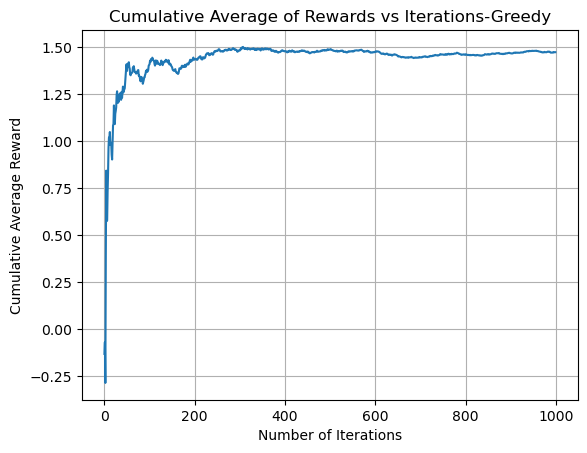

In [6]:
plt.figure()
plt.plot(cum_avg_reward1)
plt.xlabel('Number of Iterations')
plt.ylabel('Cumulative Average Reward')
plt.title('Cumulative Average of Rewards vs Iterations-Greedy')
plt.grid(True)
plt.show()

## $\epsilon$-greedy Algorithm

In [7]:
def run_epsilon_greedy(bandits,iter,epsilon):
    rewards=[]
    bandit_avg= np.zeros(len(bandits)) # all Q1 are set to zero
    bandit_freq=np.zeros(len(bandits))
    for i in range(iter):
        t= random.random()
        if(t>epsilon):
            choice=np.argmax(bandit_avg)
        else:
            choice=np.random.randint(0,len(bandits))
        reward=bandits[choice].pullLever()
        bandit_avg[choice]=bandit_avg[choice]+(reward-bandit_avg[choice])/(bandit_freq[choice]+1) #coz i goes from 0 to iter-1
        bandit_freq[choice]+=1
        rewards.append(reward)
    return rewards

Plot the cumulative average of rewards as the number of iterations increases but for various values of $\epsilon$.

In [8]:
rewards2=run_epsilon_greedy(bandits,1000,epsilon=0.1)
cum_avg_reward2= np.cumsum(rewards2)/(np.arange(len(rewards2))+1)   #arange starts from zero

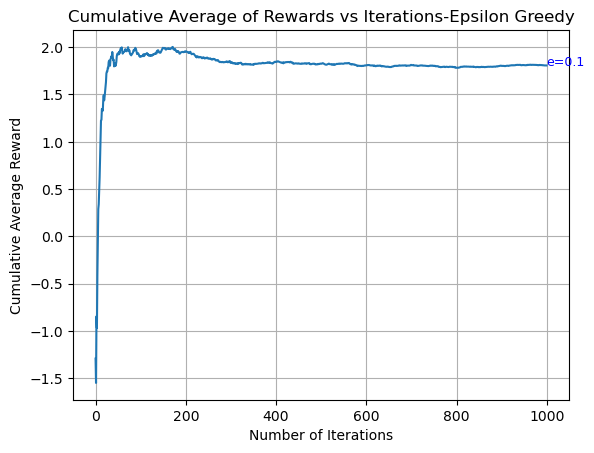

In [9]:
plt.figure()
plt.plot(cum_avg_reward2)
plt.xlabel('Number of Iterations')
plt.ylabel('Cumulative Average Reward')
plt.title('Cumulative Average of Rewards vs Iterations-Epsilon Greedy')
plt.text(len(rewards2) - 1, cum_avg_reward2[-1], "e=0.1", fontsize=9, color="blue")
plt.grid(True)
plt.show()

## Finding the optimal $\epsilon$

Run the $\epsilon$-greedy algorithm for 1000 iterations and find the optimal $\epsilon$ value by plotting the cumulative average of rewards for various values of $\epsilon$

In [18]:
epsilon_values=[0,0.001,0.005,0.002,0.1,0.2,0.3]
print(epsilon_values)

[0, 0.001, 0.005, 0.002, 0.1, 0.2, 0.3]


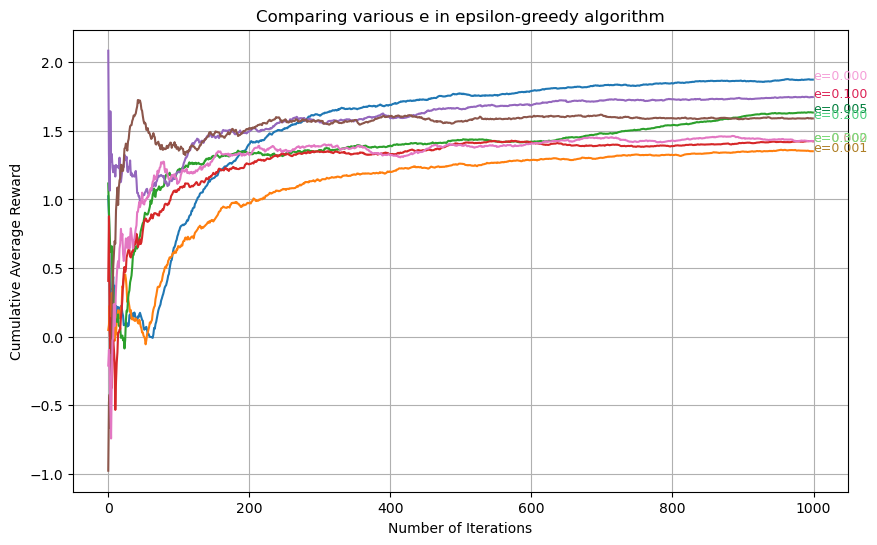

In [19]:
plt.figure(figsize=(10,6))
for epsilon in epsilon_values:
    random_color = "#{:06x}".format(random.randint(0, 0xFFFFFF))
    rewards=run_epsilon_greedy(bandits,1000,epsilon)
    cum_avg_reward= np.cumsum(rewards)/(np.arange(len(rewards))+1)
    plt.plot(cum_avg_reward, label=f"e = {epsilon:.2f}")
    plt.text(len(rewards) - 1, cum_avg_reward[-1], f"e={epsilon:.3f}", fontsize=9, color=random_color) #cum_avg_reward[-1]=last value
    plt.xlabel('Number of Iterations')
    plt.ylabel('Cumulative Average Reward')
    plt.title('Comparing various e in epsilon-greedy algorithm')
    plt.grid(True)


In [23]:
epsilon_graph=np.linspace(0,1,1000)  # 1000 values of e picked from 0 to 1
y=[]
for epsilon in epsilon_graph:
    rewards=run_epsilon_greedy(bandits,1000,epsilon)
    cum_avg_reward= np.cumsum(rewards)/(np.arange(len(rewards))+1)
    y.append(cum_avg_reward[-1])
k=np.argmax(y)
print(epsilon_graph[k])

0.031031031031031032


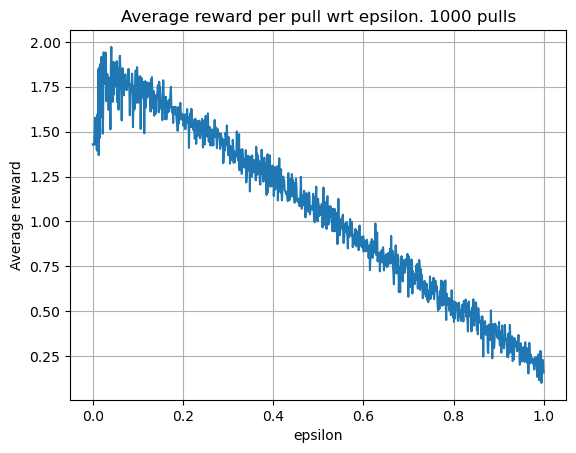

In [13]:
plt.plot(epsilon_graph,y)
plt.title('Average reward per pull wrt epsilon. 1000 pulls')
plt.xlabel('epsilon')
plt.ylabel('Average reward')
plt.grid(True)
plt.show()

## Optimistic Initial Values

In [14]:
def run_optimistic_greedy(bandits,iter):
    rewards=[]
    bandit_avg= np.full(len(bandits), 10.0) # all Q1 are set to 10
    bandit_freq=np.zeros(len(bandits))
    for i in range(iter):
        choice=np.argmax(bandit_avg)
        reward=bandits[choice].pullLever()
        bandit_avg[choice]=bandit_avg[choice]+(reward-bandit_avg[choice])/(bandit_freq[choice]+1) #coz i goes from 0 to iter-1
        bandit_freq[choice]+=1
        rewards.append(reward)
    return rewards


Plot the cumulative average of rewards as the number of iterations increases for an optimistic greedy of $Q_1 = 10$ and a non-optimistic $\epsilon = 0.1$

In [15]:
rewards3=run_optimistic_greedy(bandits,1000)
cum_avg_reward3= np.cumsum(rewards3)/(np.arange(len(rewards3))+1)   #arange starts from zero

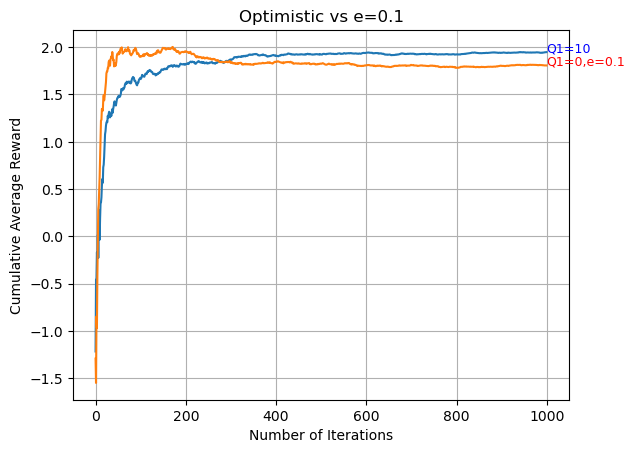

In [16]:
plt.figure()
plt.plot(cum_avg_reward3,label="Q1=10")
plt.plot(cum_avg_reward2,label='Q1=0,e=0.1')
plt.text(len(rewards3) - 1, cum_avg_reward3[-1], "Q1=10", fontsize=9, color="blue")
plt.text(len(rewards2) - 1, cum_avg_reward2[-1], "Q1=0,e=0.1", fontsize=9, color="red")
plt.xlabel('Number of Iterations')
plt.ylabel('Cumulative Average Reward')
plt.title('Optimistic vs e=0.1')
plt.grid(True)
plt.show()

## Optional - Upper Confidence Bound (UCB)

In [17]:
def run_ucb(c):
    # TODO: Implement the UCB algorithm here
    # Return the reward from the bandits in a list
    pass